In [81]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [82]:
data = pd.read_csv('data7decbroad.csv', delimiter = ',')
voltage = np.array(data.iloc[:,4])
time = np.array(data.iloc[:,3])

datafree = pd.read_csv('data7decfree0.1ampere.csv', delimiter = ',')
voltagefree = np.array(datafree.iloc[:,4])
voltagefree2 = np.array(datafree.iloc[:,10])
timefree = np.array(datafree.iloc[:,3])

# voor de visualisatie:
voltagefree2 = voltagefree2 - 0.0135



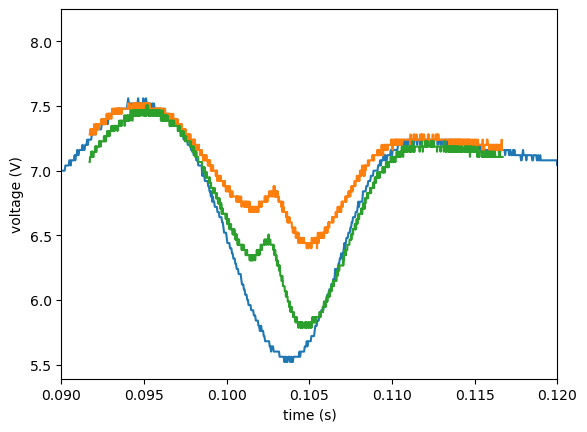

In [83]:
plt.plot(time, voltage)
plt.plot(timefree, voltagefree)
plt.plot(timefree, voltagefree2)
plt.xlim(0.09, 0.12)

plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.show()

## Doppler broad fit (frequentie as)

In [84]:
def gaussian(x, A, mu, sigma):
    return A* np.exp(-(x - mu)**2 / (2 * sigma**2))
def line(x, a, b):
    return a*x + b

In [85]:
gauss1 = models.Model(gaussian, prefix='p1_') 
gauss2 = models.Model(gaussian, prefix='p2_') 
gauss3 = models.Model(gaussian, prefix='p3_') 
gauss4 = models.Model(gaussian, prefix='p4_')
linfunctie = models.Model(line, name="lijn")

curve_model = gauss1 + gauss2 + gauss3 + gauss4 + linfunctie

In [86]:
params = curve_model.make_params(p1_A = -11, p1_mu=0.09, p1_sigma=0.003, p2_A = -11, p2_mu=0.105, p2_sigma=0.003, p3_A = -11, p3_mu=0.14, p3_sigma=0.003, p4_A=-11, p4_mu=0.17, p4_sigma=0.001,a=-0.06,b=1)
fit_result = curve_model.fit(voltage, params,x = time )

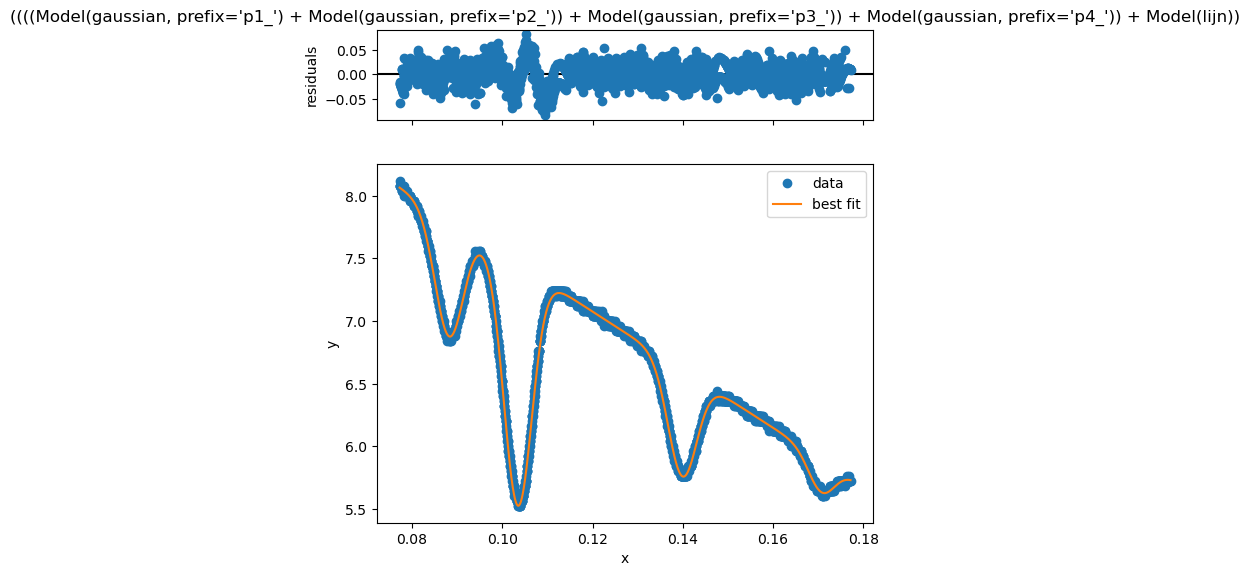

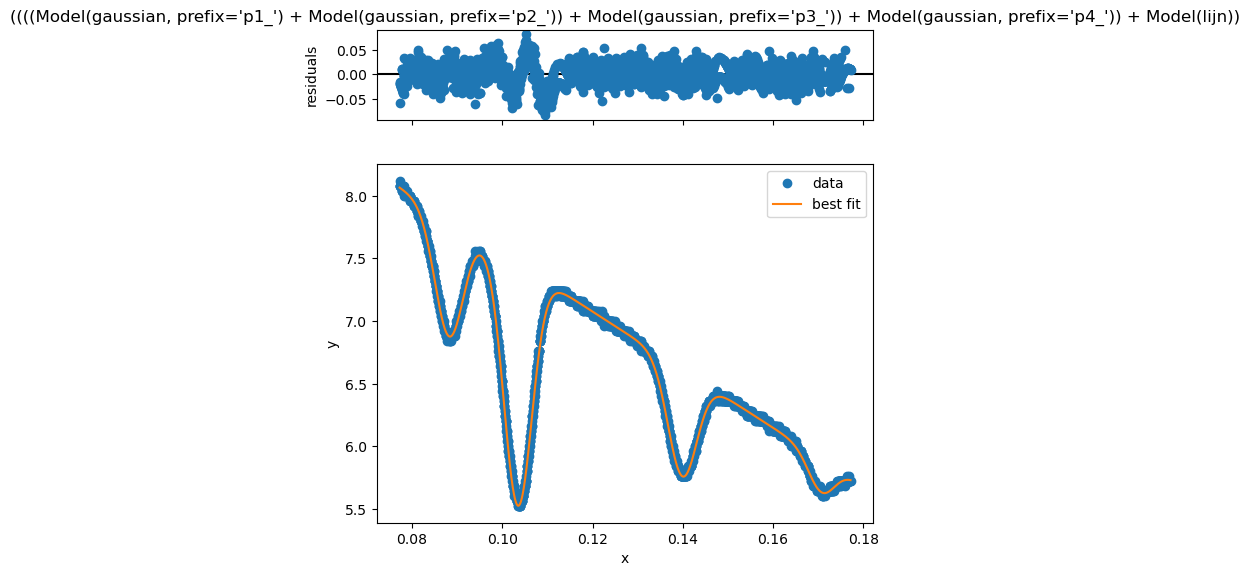

In [87]:
fit_result.plot()

In [88]:
fit_result

In [89]:
a = 6834.683/(fit_result.params['p4_mu'].value - fit_result.params['p1_mu'].value)
# b = -4271.677 - fit_result.params['p1_mu'].value*a
b = 1264.889 - fit_result.params['p3_mu'].value*a
frequency = a*time + b

In [90]:
b1 = -4271.677 - fit_result.params['p1_mu'].value*a
b2 = 1264.889 - fit_result.params['p3_mu'].value*a
b3 = -1770.884 - fit_result.params['p2_mu'].value*a
b4 = 2567.006 - fit_result.params['p4_mu'].value*a

print(b1, b2, b3, b4)

-11575.451258220339 -10322.808455302471 -10339.197586385546 -11571.45125822034


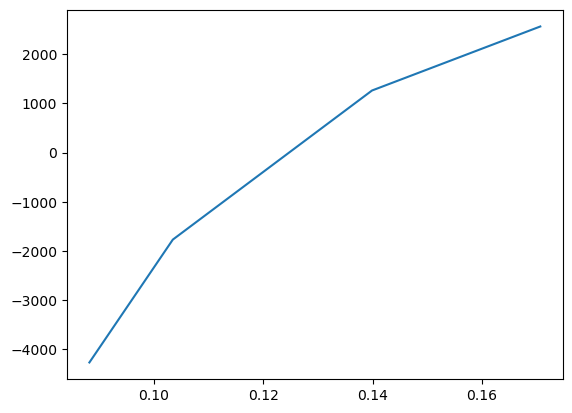

In [91]:
time_test = [fit_result.params['p1_mu'].value, fit_result.params['p2_mu'].value, fit_result.params['p3_mu'].value, fit_result.params['p4_mu'].value]
freq_test = [-4271.677, -1770.884, 1263.889, 2567.006 ]
plt.plot(time_test, freq_test)

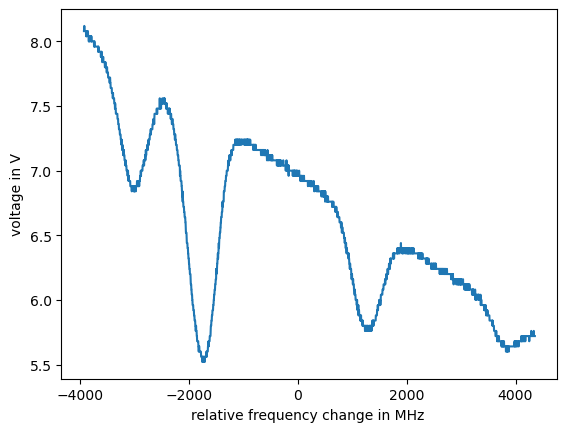

In [92]:
plt.plot(frequency, voltage)
plt.xlabel("relative frequency change in MHz ")
plt.ylabel("voltage in V")

plt.show()

In [93]:
#testing the frequency axis
delta_f_1 = (fit_result.params['p2_mu'].value*a) - (fit_result.params['p1_mu'].value*a)
delta_f_2 = (fit_result.params['p3_mu'].value*a) - (fit_result.params['p2_mu'].value*a)
delta_f_3 = (fit_result.params['p4_mu'].value*a) - (fit_result.params['p3_mu'].value*a)

print(delta_f_1, delta_f_2, delta_f_3)

1264.539328165206 3019.3838689169243 2550.75980291787


## Doppler free zeeman splitted fit

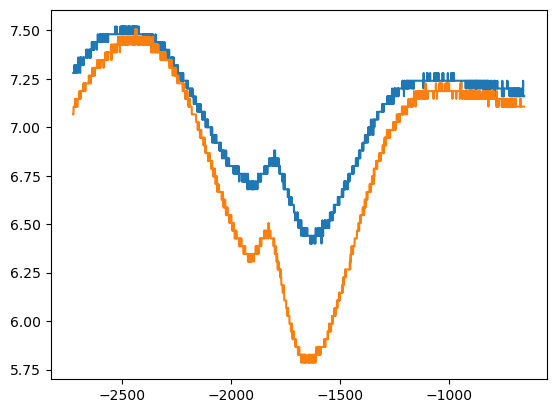

In [99]:
frequency = a*timefree + b

plt.plot(frequency, voltagefree)
plt.plot(frequency, voltagefree2)
plt.show()

In [100]:
gauss1 = models.Model(gaussian, prefix='p1_')
gauss2 = models.Model(gaussian, prefix='p2_')
gauss3 = models.Model(gaussian, prefix='p3_')
linear_function = models.Model(line, name="lijn")

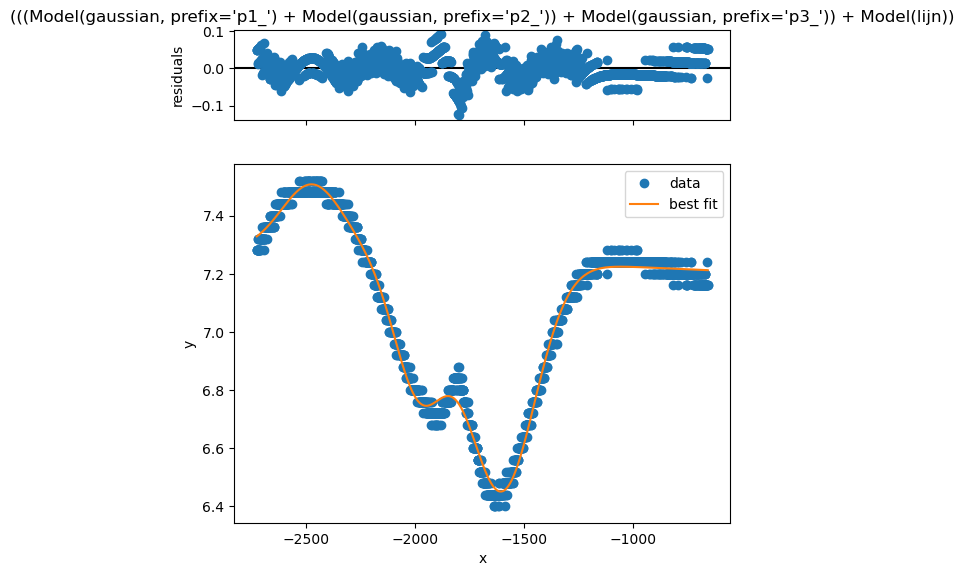

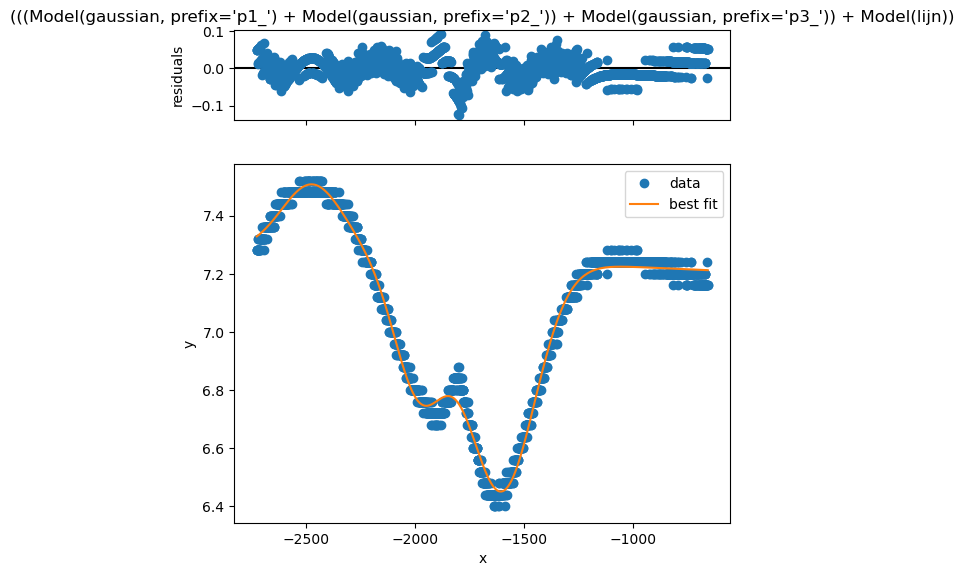

In [104]:
curve1 = gauss1 + gauss2 + gauss3 + linear_function
params = curve1.make_params(p1_A = 10, p1_mu=-2500, p1_sigma=300, p2_A = -10, p2_mu=-1900, p2_sigma=100, p3_A=-10, p3_mu=-1600, p3_sigma=100,a=-0.6,b=7)
fit_curve1 = curve1.fit(voltagefree, params,x=frequency )

fit_curve1.plot()

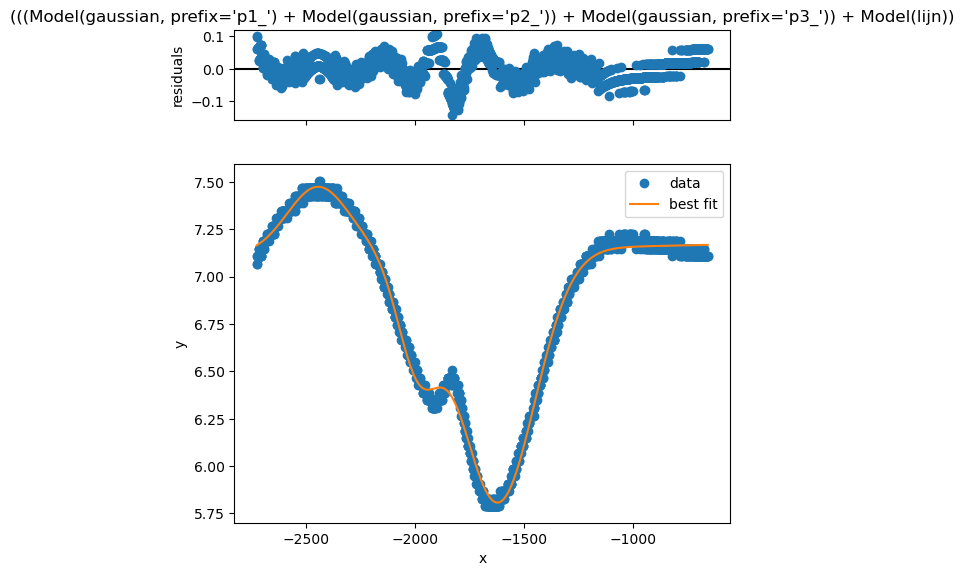

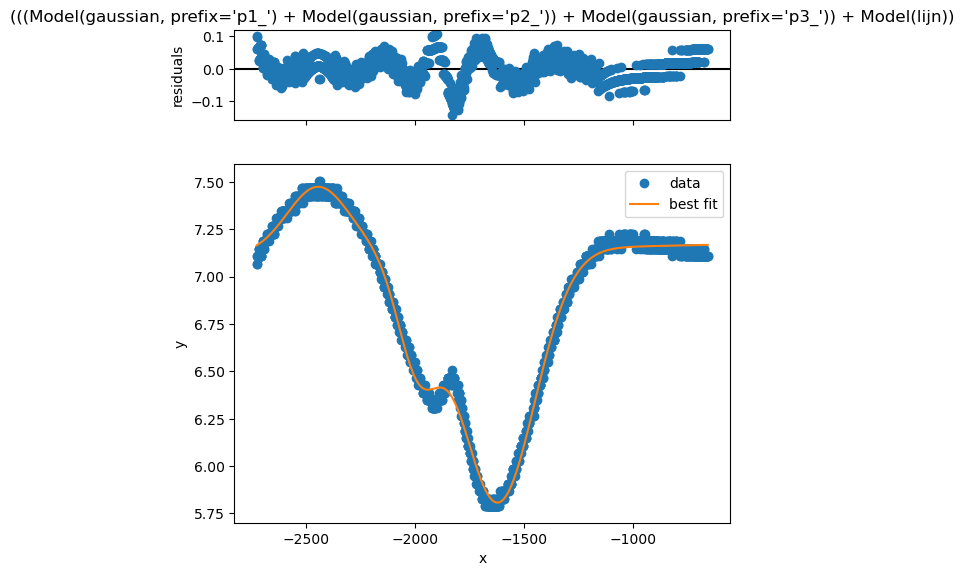

In [107]:
curve2 = gauss1 + gauss2 + gauss3 + linear_function
params = curve2.make_params(p1_A = 10, p1_mu=-2500, p1_sigma=300, p2_A = -10, p2_mu=-1900, p2_sigma=100, p3_A=-10, p3_mu=-1600, p3_sigma=100,a=-0.6,b=7)
fit_curve2 = curve2.fit(voltagefree2, params,x=frequency )

fit_curve2.plot()

In [111]:
delta_f_MHz = 0.5*(fit_curve1.params['p3_mu'].value - fit_curve2.params['p3_mu'].value)
print(delta_f_MHz)

delta_E = (6.626*10**(-34))*delta_f_MHz*(10**6)
print(delta_E)



7.677148430942452
5.0868785503424686e-27
